# Dependencies, Styling, Data Call

In [89]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from itertools import cycle
from datetime import datetime
from dateutil.relativedelta import relativedelta

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.patches import Polygon

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
# some styling configs
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [3]:
# read in 3 tables

# Promotional Calendar
promo_cal = pd.read_csv(r"calendar.csv")
# Sales Data
sales = pd.read_csv(r'sales_train_validation.csv')
# Price List
price = pd.read_csv(r'sell_prices.csv')

## Looking at the Data

##### Promo Calendar

In [4]:
promo_cal[['d','date','event_name_1','event_name_2',
     'event_type_1','event_type_2', 'snap_CA']].head()

d       date event_name_1 event_name_2 event_type_1 event_type_2  snap_CA
0  d_1  1/29/2011          NaN          NaN          NaN          NaN        0
1  d_2  1/30/2011          NaN          NaN          NaN          NaN        0
2  d_3  1/31/2011          NaN          NaN          NaN          NaN        0
3  d_4   2/1/2011          NaN          NaN          NaN          NaN        1
4  d_5   2/2/2011          NaN          NaN          NaN          NaN        1

##### Sales Data

In [5]:
sales.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0  ...       1       0       5       4       1   
4       CA    0    0    0    0  ...       2       1       1       0       1   

   d_1909  d_1910  d_1911  d_1912  d_1913  
0       1       3       0       1       1  
1       1       0       0       0       0  
2       1       0       1       1       1  
3       0       1       3       7       2  
4       1       2       2       2       4  

[5 rows x 1919 columns]

##### Price List

In [6]:
price.head(5).round(2)

store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

### Visualize Variables

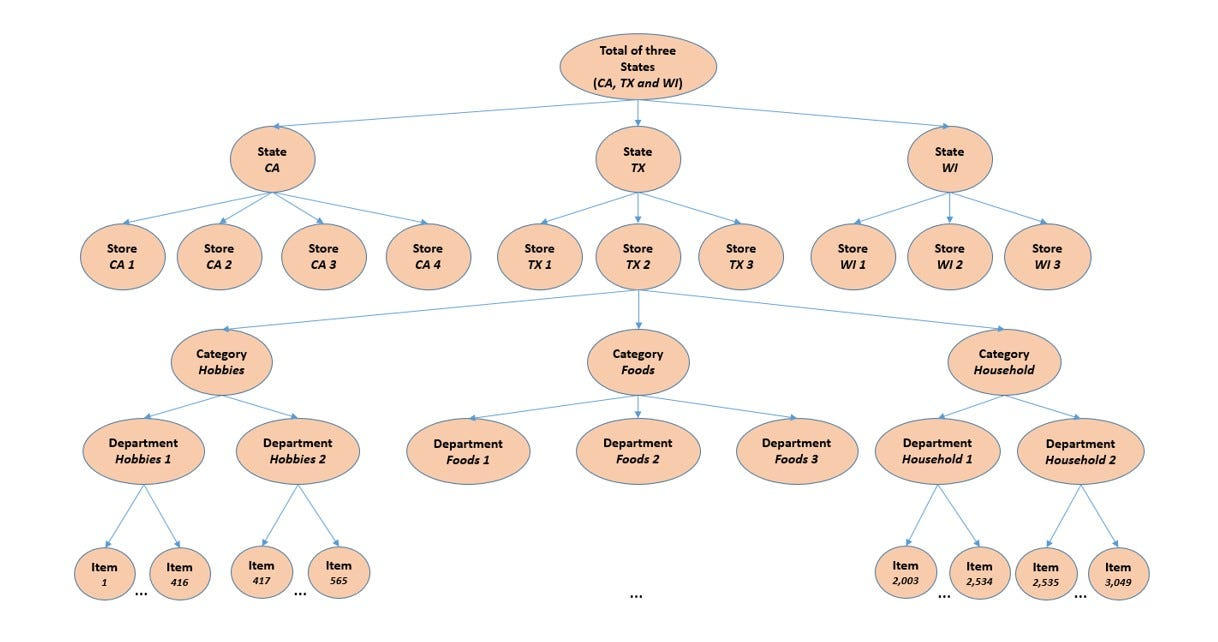

## Daily Sales for Top SKU by Category
####
- Top Product each Category
- Food / Hobby / Household

In [20]:
# filter and transpose
d_cols = [c for c in sales.columns if 'd_' in c]
top_food = sales.loc[sales['id'] == 'FOODS_3_090_CA_3_validation'][d_cols].T

# clean & merge
top_food.columns = ['FOODS_3_090_CA_3']
top_food = top_food.reset_index().rename(columns={'index': 'd'})
top_food = top_food.merge(promo_cal, how='left', on='d', validate='1:1')
top_food['date'] = pd.to_datetime(top_food['date'])

# make plot
fig = px.scatter(top_food,
              x='date', 
              y='FOODS_3_090_CA_3', 
              title='Daily Sales<br>FOODS_3_090_CA_3',
              template='plotly_white',
                 trendline='ols',trendline_color_override='black'
              )

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Sales',
    width=900,
    height=350
)

fig.show()


<IPython.core.display.Javascript object>

In [24]:
# filter and transpose
top_hobby = sales.loc[sales['id'] == 'HOBBIES_1_234_CA_3_validation'][d_cols].T

# clean & merge
top_hobby.columns = ['HOBBIES_1_234_CA_3']
top_hobby = top_hobby.reset_index().rename(columns={'index': 'd'})
top_hobby = top_hobby.merge(promo_cal, how='left', on='d', validate='1:1')
top_hobby['date'] = pd.to_datetime(top_hobby['date'])

# plot
fig = px.scatter(top_hobby, 
                 x='date', 
                 y='HOBBIES_1_234_CA_3', 
                 template='plotly_white', 
                 title='Daily Sales<br>HOBBIES_1_234_CA_3', 
                 trendline='ols', trendline_color_override='black')

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Sales',
    width=900,
    height=350
)

fig.show()


<IPython.core.display.Javascript object>

In [26]:
# filter and transpose
top_hh = sales.loc[sales['id'] == 'HOUSEHOLD_1_118_CA_3_validation'][d_cols].T

# clean & merge
top_hh.columns = ['HOUSEHOLD_1_118_CA_3']
top_hh = top_hh.reset_index().rename(columns={'index': 'd'})
top_hh = top_hh.merge(promo_cal, how='left', on='d', validate='1:1')
top_hh['date'] = pd.to_datetime(top_hh['date'])

# plot
fig = px.scatter(top_hh, x='date', y='HOUSEHOLD_1_118_CA_3', trendline='ols',trendline_color_override='black', template='plotly_white', title='Daily Sales<br>HOUSEHOLD_1_118_CA_3')

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Sales',
    width=900,
    height=350
)

fig.show()


<IPython.core.display.Javascript object>

### Top Category SKU by...
- Day of Week
- Month
- Year

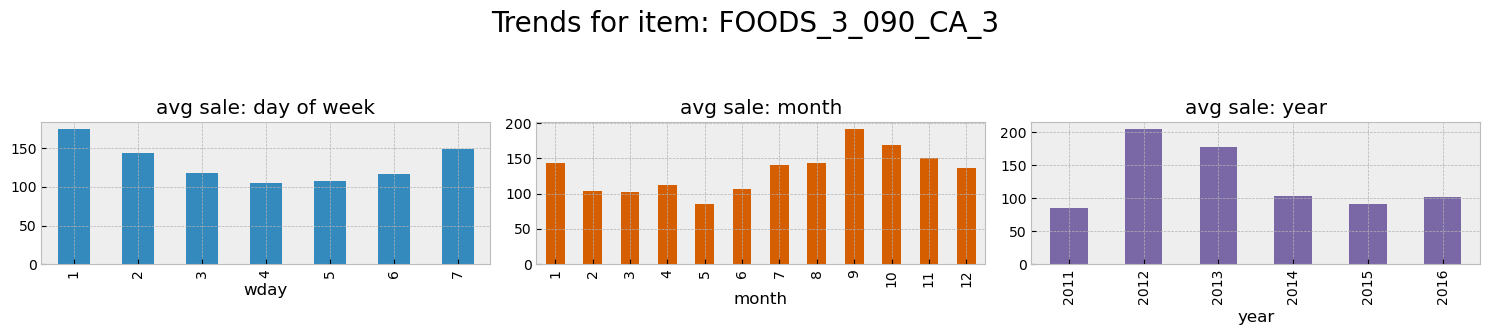

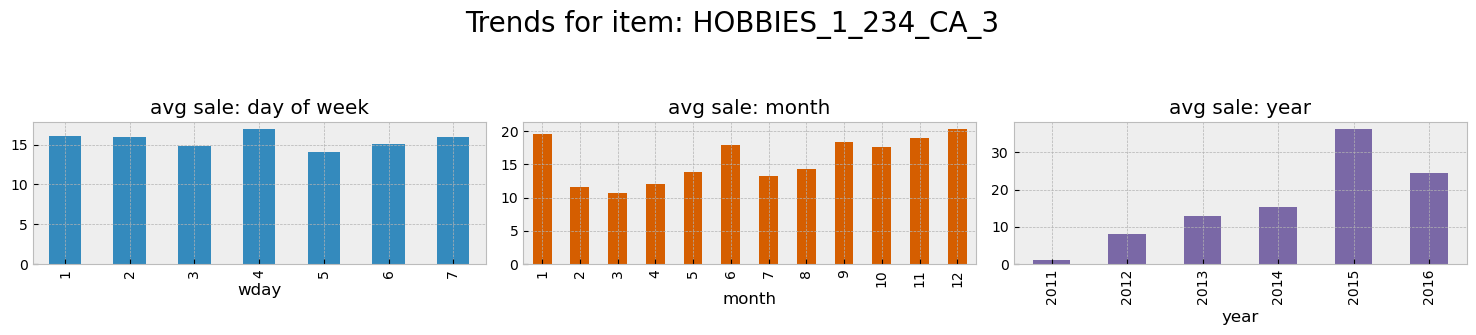

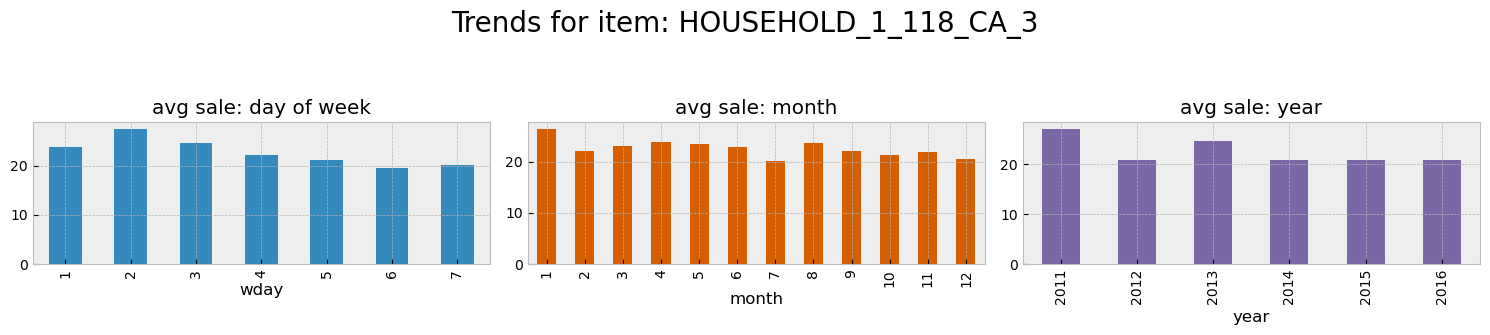

In [27]:
top_3 = ['FOODS_3_090_CA_3','HOBBIES_1_234_CA_3','HOUSEHOLD_1_118_CA_3']
top3_df = [top_food, top_hobby, top_hh]
for i in [0, 1, 2]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
    top3_df[i].groupby('wday').mean()[top_3[i]] \
        .plot(kind='bar',
              title='avg sale: day of week',
              lw=5,
              color=color_pal[0],
              ax=ax1)
    top3_df[i].groupby('month').mean()[top_3[i]] \
        .plot(kind='bar',
              title='avg sale: month',
              lw=5,
              color=color_pal[4],
              ax=ax2)
    top3_df[i].groupby('year').mean()[top_3[i]] \
        .plot(kind='bar',
              lw=5,
              title='avg sale: year',
              color=color_pal[2],
              ax=ax3)
    fig.suptitle(f'Trends for item: {top_3[i]}',
                 size=20,
                 y=1.1)
    plt.tight_layout()
    plt.show()

### Number of Items by Category

In [28]:
# groupby category
category_counts = sales.groupby('cat_id').count()['id'].sort_values().reset_index()

# plot
fig = px.bar(category_counts, x='id', y='cat_id', orientation='h',
             title='Number of Items by Category',
             labels={'id': 'Count', 'cat_id': 'Category'},
             color='cat_id',
             width=800, height=400,
             template='plotly_white',
             text_auto='.2s')

fig.update_layout(showlegend=False)

fig.show()


<IPython.core.display.Javascript object>

### Daily Sales by Category

In [29]:
# prep data
past_sales = sales.set_index('id')[d_cols].T.merge(promo_cal.set_index('d')['date'],
           left_index=True,
           right_index=True,
           validate='1:1') \
    .set_index('date')

total_sales_df = pd.DataFrame(index=past_sales.index)

# iterate for mean sales by category
for cat_id in sales['cat_id'].unique():
    items_col = [c for c in past_sales.columns if cat_id in c]
    total_sales_df[cat_id] = past_sales[items_col].sum(axis=1)

# plot
fig = px.line(total_sales_df, x=total_sales_df.index, y=total_sales_df.columns,
              template='plotly_white',
              title='Daily Sales by Category', labels={'value': 'Total Sales', 'index': 'Date'})

fig.update_layout(legend_title=None)
fig.show()


<IPython.core.display.Javascript object>

### Non-Zero Sales

In [30]:
# standardize sales between 0-1
past_sales_clipped = past_sales.clip(0, 1)
mean_sale_percentage_df = pd.DataFrame(index=past_sales.index)

# iterate for mean sales by category
for cat_id in sales['cat_id'].unique():
    items_col = [c for c in past_sales.columns if cat_id in c]
    mean_sale_percentage_df[cat_id] = past_sales_clipped[items_col].mean(axis=1) * 100

# plot
fig = px.scatter(mean_sale_percentage_df, x=mean_sale_percentage_df.index, y=mean_sale_percentage_df.columns,
                 title='Inventory Sale Percentage by Date', template='plotly_white', labels={'value': '% of Inventory with at least 1 sale', 'index': 'Date'})

fig.update_layout(showlegend=True, legend_title=None)
fig.show()


<IPython.core.display.Javascript object>

### Store Level Daily Sales (10 stores)

In [90]:

# Get unique store IDs
store_list = price['store_id'].unique()

# Create an empty DataFrame to store the rolling 90-day average total sales for each store
rolling_avg_df = pd.DataFrame(index=past_sales.index)

# Iterate over store IDs and calculate the rolling 90-day average total sales
for store_id in store_list:
    store_items = [c for c in past_sales.columns if store_id in c]
    rolling_avg_df[store_id] = past_sales[store_items].sum(axis=1).rolling(90).mean()

# Plot the rolling 90-day average total sales using Plotly Express
fig = px.line(rolling_avg_df, x=rolling_avg_df.index, y=rolling_avg_df.columns, template='plotly_white',
              title='Rolling 90 Day Average Total Sales (10 stores)', labels={'value': 'Total Sales', 'date': 'Date'})

# Update layout
fig.update_layout(showlegend=True, legend_title='Store ID')

# Show the plot
fig.show()


<IPython.core.display.Javascript object>

### Daily Sales (same as above but ind graphs)

In [32]:
# get store id's
store_list = price['store_id'].unique()

# make subplots
fig = make_subplots(rows=5, cols=2, subplot_titles=store_list, shared_xaxes=True, vertical_spacing=0.1)

# iterate and plot
for i, store_id in enumerate(store_list, start=1):
    store_items = [c for c in past_sales.columns if store_id in c]
    weekly_sales_mean = past_sales[store_items].sum(axis=1).rolling(7).mean()
    row = (i - 1) // 2 + 1  # Correcting row index calculation
    col = (i - 1) % 2 + 1  # Correcting column index calculation
    fig.add_trace(go.Scatter(x=weekly_sales_mean.index, y=weekly_sales_mean, mode='lines', name=store_id), row=row, col=col)

fig.update_layout(title='Weekly Sale Trends by Store ID', showlegend=False, height=1200, width=1000)

# update layout
fig.update_xaxes(title_text='Date', row=5, col=1)
fig.update_yaxes(title_text='Weekly Sales', row=3, col=1)

fig.show()





### Daily Sales Heatmap

In [33]:
# heatmap function

def calmap(ax, year, data):
    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # set borders
    xticks, labels = [], []
    start = datetime(year,1,1).weekday()
    for month in range(1,13):
        first = datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]
        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",
                       linewidth=1, zorder=20, clip_on=False)
        ax.add_artist(poly)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(0.5 + np.arange(7))
    ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_title("{}".format(year), weight="semibold")
    
    # remove first / last day of data
    valid = datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime(year, 12, 31).weekday()
    data[valid+1:,x1] = np.nan

    # show
    ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=-1, vmax=1,
              cmap="RdYlBu_r", origin="lower", alpha=.75)

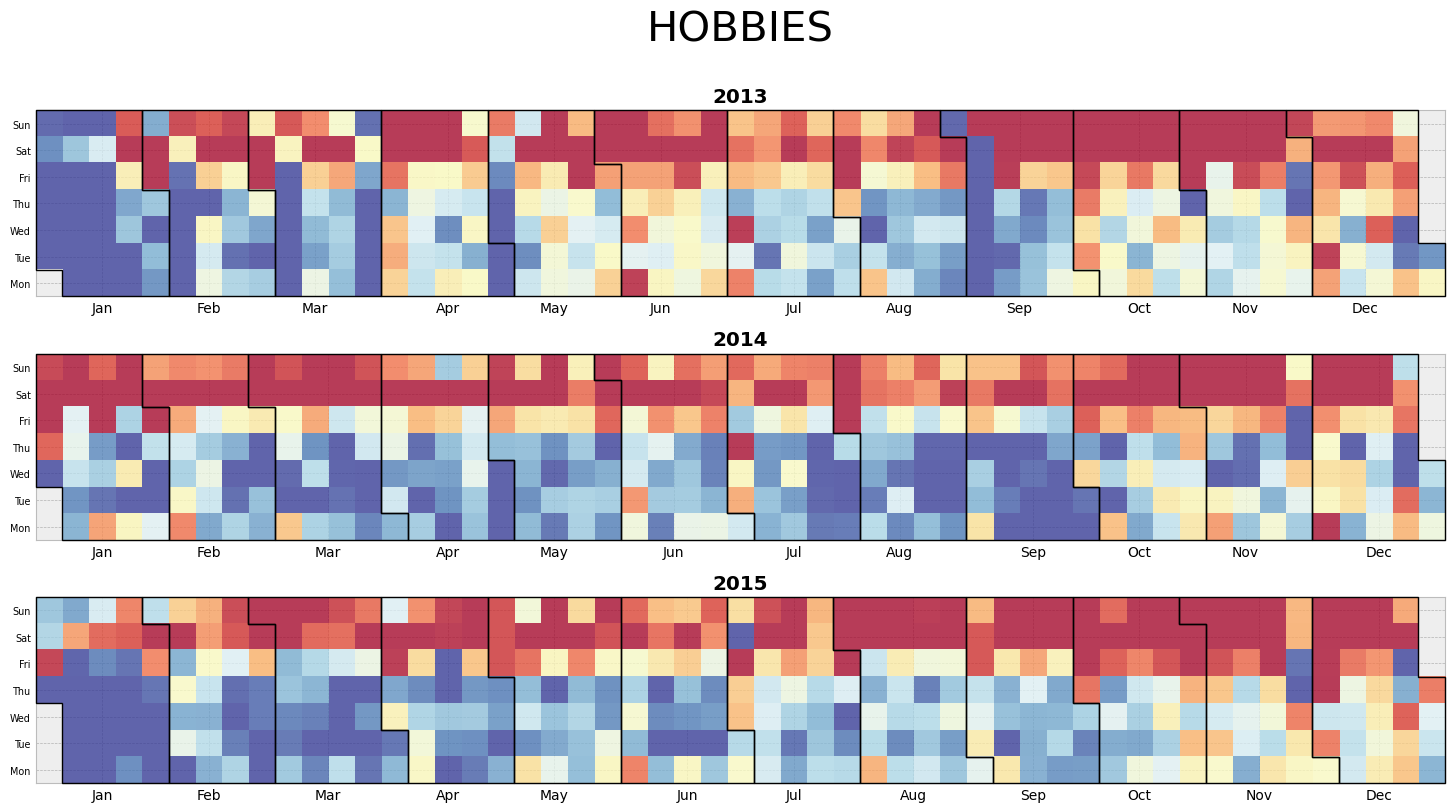

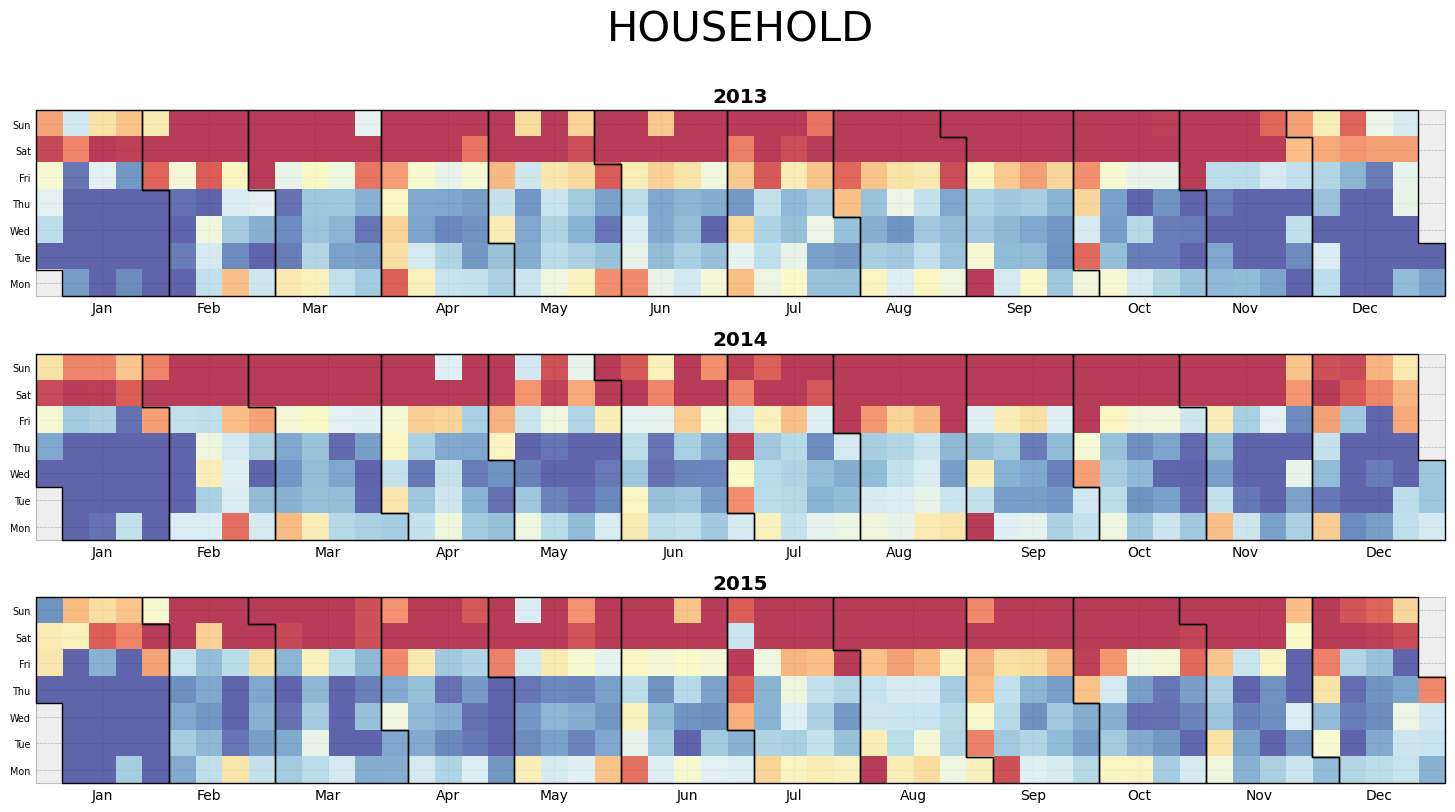

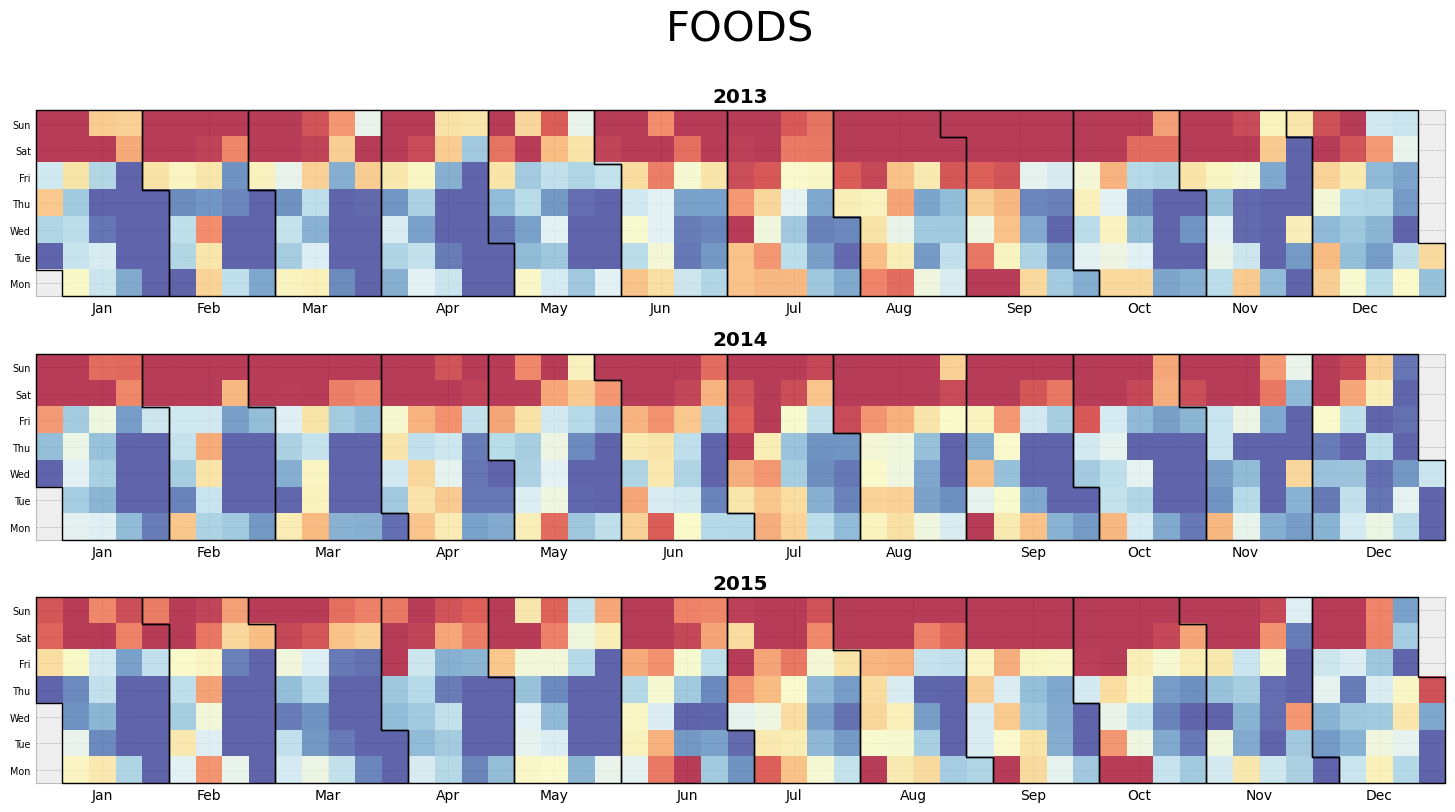

In [34]:
# create heatmap

past_sales.index = pd.to_datetime(past_sales.index)

sscale = StandardScaler()

for i in sales['cat_id'].unique():
    fig, axes = plt.subplots(3, 1, figsize=(20, 8))
    items_col = [c for c in past_sales.columns if i in c]

    sales2013 = past_sales.loc[past_sales.index.isin(pd.date_range('31-Dec-2012',periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2013.values.reshape(-1, 1)))
    calmap(axes[0], 2013, vals.reshape(53,7).T)

    sales2014 = past_sales.loc[past_sales.index.isin(pd.date_range('30-Dec-2013',periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2014.values.reshape(-1, 1)))
    calmap(axes[1], 2014, vals.reshape(53,7).T)

    sales2015 = past_sales.loc[past_sales.index.isin(pd.date_range('29-Dec-2014',periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2015.values.reshape(-1, 1)))
    calmap(axes[2], 2015, vals.reshape(53,7).T)

    plt.suptitle(i, fontsize=30, x=0.5, y=1.01)
    plt.tight_layout()
    plt.show()

### Price Movement of Item

In [38]:
# filter data for the specific item_id
filtered_price = price.query('item_id == "FOODS_3_090"')
# 
# plot
fig = px.scatter(
    filtered_price, 
    x='wm_yr_wk', 
    y='sell_price', 
    color='store_id', 
    title='Item:  FOODS_3_090 sale price over time',
    labels={'sell_price': 'Sell Price', 'wm_yr_wk': 'Week'},
    template='plotly_white',
    hover_name='sell_price'
)

fig.update_layout(
    xaxis_title='Day Number',
    yaxis_title='Sell Price',
    legend_title_text='Store ID',
    width=1000,
    height=400
)

fig.show()

<IPython.core.display.Javascript object>

### Using AutoCorrelation to Look at Seasonality & Residuals
#####
- measuring a current time series against a past version of itself

In [80]:
corr_data = sales[d_cols].sum().to_frame().rename(columns={0:'Sales'})

start_date = pd.to_datetime('2011-01-01')
corr_data['date'] = pd.date_range(start=start_date, periods=len(corr_data), freq='D')

# diff col
corr_data['diff'] = corr_data['Sales'].diff()

# fig
fig = px.scatter(corr_data, x='date', y=['Sales','diff'], title='Total Sales vs Diff YoY Sales', template='plotly_white')

# Add vertical lines for each year from 2011 to 2016
for yr in range(2011, 2017):
    fig.add_vline(x=pd.to_datetime(f'{yr}-01-01'), line=dict(color='red', dash='dash', width=1), opacity=0.2)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Sales',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='center',
        x=0.5,
        title=None
    )
)

# plot
fig.show()

<IPython.core.display.Javascript object>

#### high YoY correlation in Dec/Jan & May/June/Jul

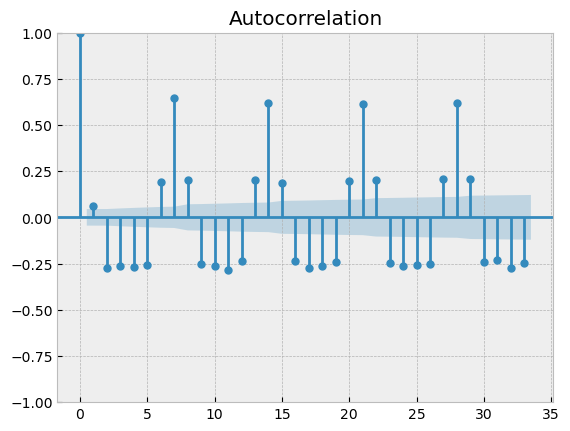

In [81]:
from statsmodels.graphics.tsaplots import plot_acf

corr_data = corr_data.dropna()

corr_data["diff"].iloc[0] = 0
plot_acf(corr_data["diff"])
plt.show()

### Comparison

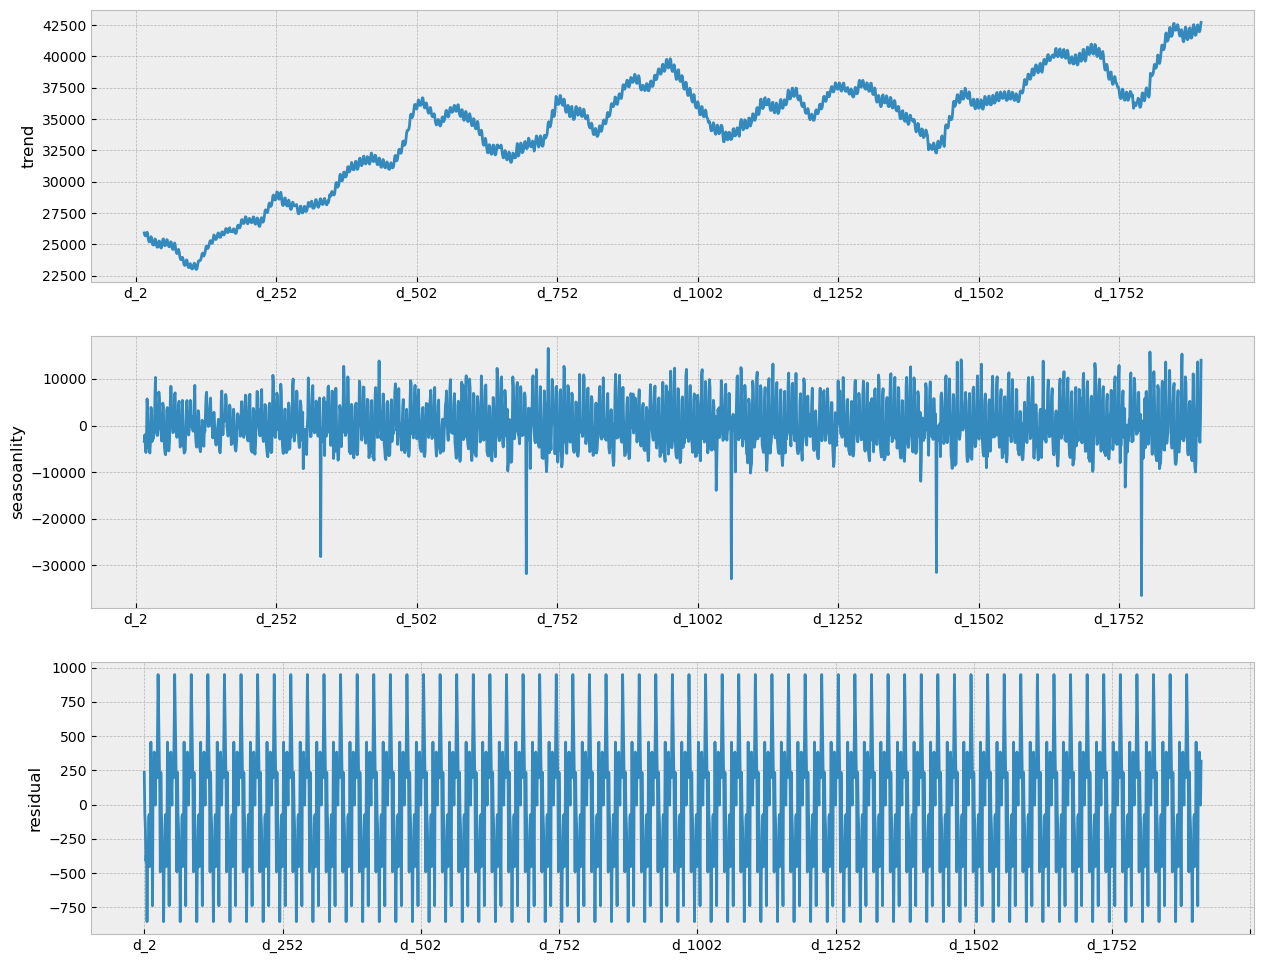

In [88]:

corr_data['date'] = corr_data['date'].astype('string')
corr_data = corr_data.convert_dtypes()

res = seasonal_decompose(corr_data.Sales, model = "additive",period = 30)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,12))
res.trend.plot(ax=ax1,ylabel = "trend")
res.resid.plot(ax=ax2,ylabel = "seasoanlity")
res.seasonal.plot(ax=ax3,ylabel = "residual")
plt.show()